# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [10]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy.stats import normaltest, binom, poisson
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [11]:
# Your code here
x1 = np.random.normal(loc=50, scale= 5, size=10)
x2 = np.random.normal(loc=50, scale= 5, size=50)
x3 = np.random.normal(loc=50, scale= 5, size=500)
x4 = np.random.normal(loc=50, scale= 5, size=5000)

#### Interpret the normaltest results and make your observations.

In [12]:
normaltest(x1)

NormaltestResult(statistic=0.04154714505328308, pvalue=0.9794407117493512)

In [13]:
normaltest(x2)

NormaltestResult(statistic=1.398985286600312, pvalue=0.49683731359635774)

In [14]:
normaltest(x3)

NormaltestResult(statistic=3.29378004001601, pvalue=0.19264810970858748)

In [15]:
normaltest(x4)

NormaltestResult(statistic=1.0204677658502108, pvalue=0.6003551495724215)

In [16]:
# Explain the test results here
'''If pvalue is too small, it means it is unlikely that the data came from a normal distribution. If p is close to 1, results are meaningful. Traditionally, in statistics, you need a p-value of less than 0.05 to reject the null hypothesis.'''

'If pvalue is too small, it means it is unlikely that the data came from a normal distribution. If p is close to 1, results are meaningful. Traditionally, in statistics, you need a p-value of less than 0.05 to reject the null hypothesis.'

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([  2.,   1.,   3.,   7.,  14.,  22.,  32.,  57.,  98., 140., 204.,
        258., 340., 377., 446., 490., 488., 421., 392., 329., 286., 206.,
        135., 111.,  60.,  40.,  22.,  12.,   5.,   2.]),
 array([31.21249437, 32.38970132, 33.56690828, 34.74411524, 35.9213222 ,
        37.09852915, 38.27573611, 39.45294307, 40.63015002, 41.80735698,
        42.98456394, 44.1617709 , 45.33897785, 46.51618481, 47.69339177,
        48.87059872, 50.04780568, 51.22501264, 52.4022196 , 53.57942655,
        54.75663351, 55.93384047, 57.11104742, 58.28825438, 59.46546134,
        60.6426683 , 61.81987525, 62.99708221, 64.17428917, 65.35149612,
        66.52870308]),
 <a list of 30 Patch objects>)

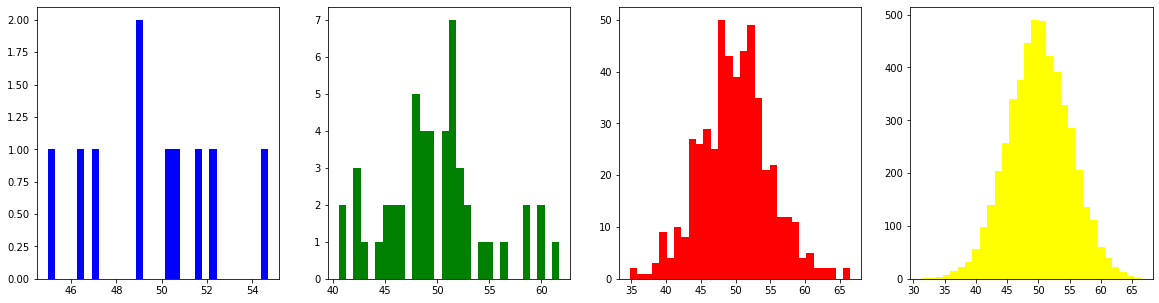

In [17]:
# Your code here
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.hist(x1, bins=30, color='blue')
plt.subplot(1,4,2)
plt.hist(x2, bins=30, color='green')
plt.subplot(1,4,3)
plt.hist(x3, bins=30, color='red')
plt.subplot(1,4,4)
plt.hist(x4, bins=30, color='yellow')

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [18]:
# Your comment and explanation here
'''With a higher sampli, the mean of means is a normal distribution around the mean'''

'With a higher sampli, the mean of means is a normal distribution around the mean'

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

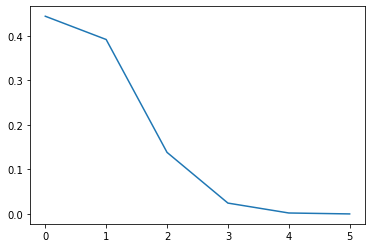

In [19]:
# Your code here
n, p = 5, 0.15
x =range(0,6)

data_binom = binom.pmf(x,n,p)

plt.plot(data_binom)
plt.show()

#### Explain what you observe from the plot above

In [20]:
# Your comment here
'''
The probability of a person from five-people sample clicking is higher than 2 from five-people descending as the number of people increases.
'''

'\nThe probability of a person from five-people sample clicking is higher than 2 from five-people descending as the number of people increases.\n'

#### Now plot PMP with 50, 500, and 5000 visitors.

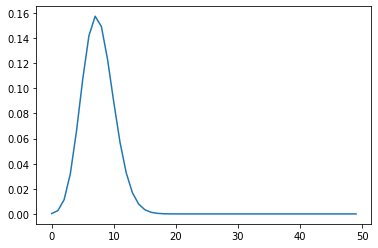

In [21]:
# Your code here
n, p = 50, 0.15
x =range(n)

data_binom = binom.pmf(x,n,p)

plt.plot(data_binom)
plt.show()

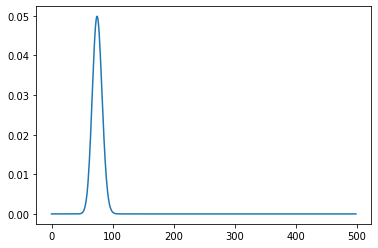

In [22]:
# Your comment here
n, p = 500, 0.15
x =range(500)

data_binom = binom.pmf(x,n,p)

plt.plot(data_binom)
plt.show()

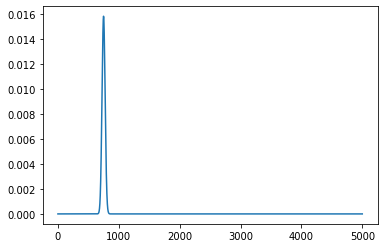

In [23]:
# Your comment here
n, p = 5000, 0.15
x =range(n)

data_binom = binom.pmf(x,n,p)

plt.plot(data_binom)
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [24]:
# Your code here
'''
As long as the population increases, the probability of a group of people clicking increases too.
'''

'\nAs long as the population increases, the probability of a group of people clicking increases too.\n'

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [25]:
# Your code here
'''
Explain for small or unusual events the likely number of times that an event
will occur during a period.
'''

'\nExplain for small or unusual events the likely number of times that an event\nwill occur during a period.\n'

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [26]:
average = 300
k = 320
poisson.pmf(k,average)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [27]:
average = 300
k = 60
poisson.pmf(k,average)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

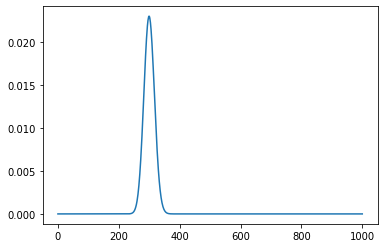

In [28]:
# your code here
average = 300
k = range(1001)
plt.plot(poisson.pmf(k,300))